# 📊 Exploratory Data Analysis (EDA) - Olist E-commerce Dataset

In [1]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 🔍 Load the data

In [2]:
# Load cleaned data from CSV (you can switch to SQL if preferred)
orders = pd.read_csv('data/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp'])
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
categories = pd.read_csv('data/product_category_name_translation.csv')

## 📈 Overview of Orders

In [3]:
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


,order_purchase_timestamp
count,99441
mean,2017-12-31 08:43:12.776581120
min,2016-09-04 21:15:19
25%,2017-09-12 14:46:19
50%,2018-01-18 23:04:36
75%,2018-05-04 15:42:16
max,2018-10-17 17:30:18


## 📊 Orders Over Time

<Axes: title={'center': 'Monthly Orders'}, xlabel='order_purchase_timestamp'>

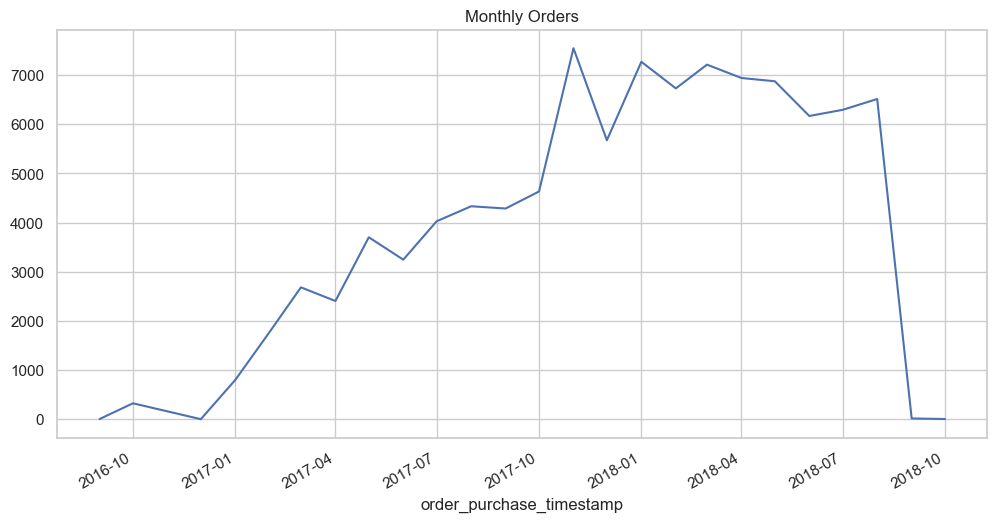

In [4]:
monthly_orders = orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M')).size()
monthly_orders.index = monthly_orders.index.to_timestamp()
monthly_orders.plot(title='Monthly Orders')

## 💳 Payment Method Distribution

<Axes: title={'center': 'Payment Types'}, xlabel='payment_type'>

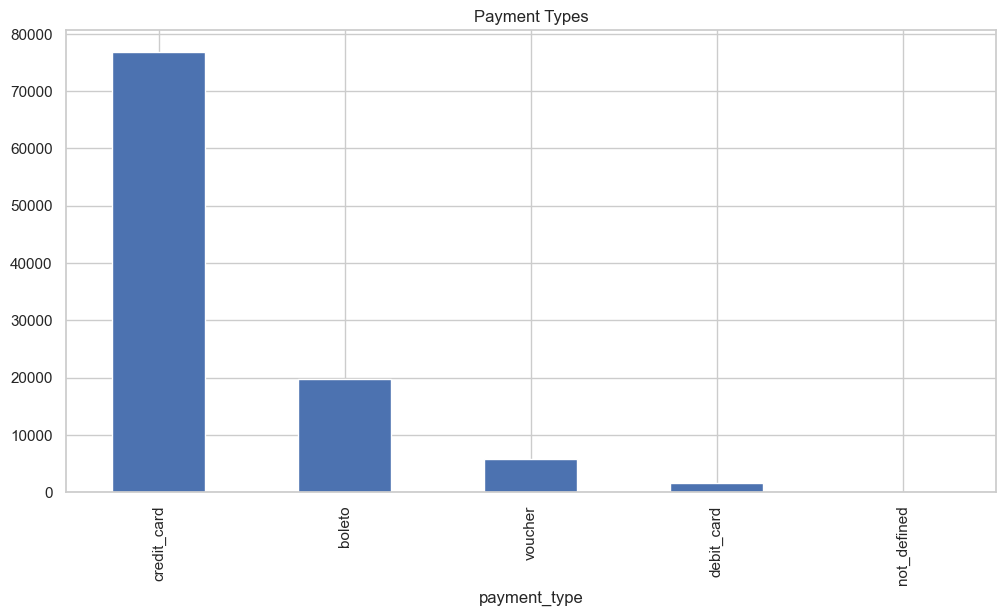

In [5]:
payments['payment_type'].value_counts().plot(kind='bar', title='Payment Types')

## 🛍️ Top Product Categories

<Axes: title={'center': 'Top Product Categories'}, xlabel='product_category_name_english'>

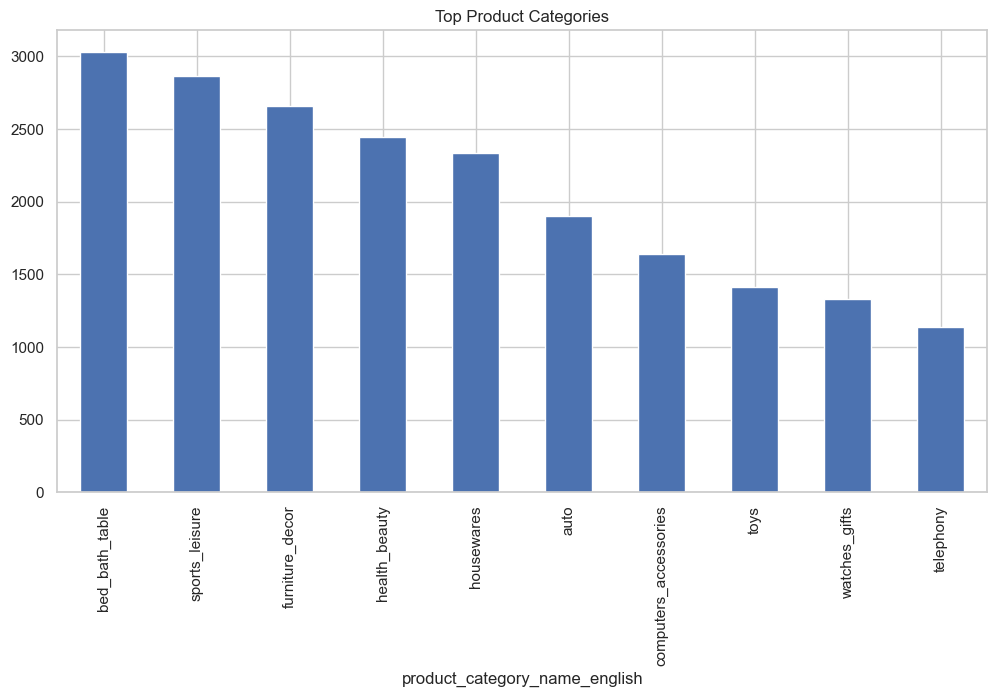

In [6]:
product_data = products.merge(categories, on='product_category_name', how='left')
top_categories = product_data['product_category_name_english'].value_counts().head(10)
top_categories.plot(kind='bar', title='Top Product Categories')

## 📝 Summary
- Credit card is the most common payment method.
- Orders peaked during the end of the year.
- Some categories clearly dominate the market.
- There are missing values that need to be handled (e.g., delivery timestamps).